In [7]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

Note: not using Google CoLab


[[[199 213 240]
  [200 214 240]
  [200 214 240]
  ...
  [ 86  34  96]
  [ 48   4  57]
  [ 57  21  65]]

 [[199 213 239]
  [200 214 240]
  [200 214 240]
  ...
  [215 215 251]
  [252 242 255]
  [237 218 250]]

 [[200 214 240]
  [200 214 240]
  [201 215 241]
  ...
  [227 238 255]
  [167 180 197]
  [ 61  79  91]]

 ...

 [[136 112 108]
  [137 113 109]
  [140 116 112]
  ...
  [ 85  84  63]
  [ 91  90  69]
  [ 93  92  72]]

 [[119  90  84]
  [118  89  83]
  [119  90  84]
  ...
  [ 86  84  61]
  [ 89  87  64]
  [ 90  88  65]]

 [[129  96  89]
  [129  96  89]
  [131  98  91]
  ...
  [ 86  82  57]
  [ 89  85  60]
  [ 89  85  60]]]


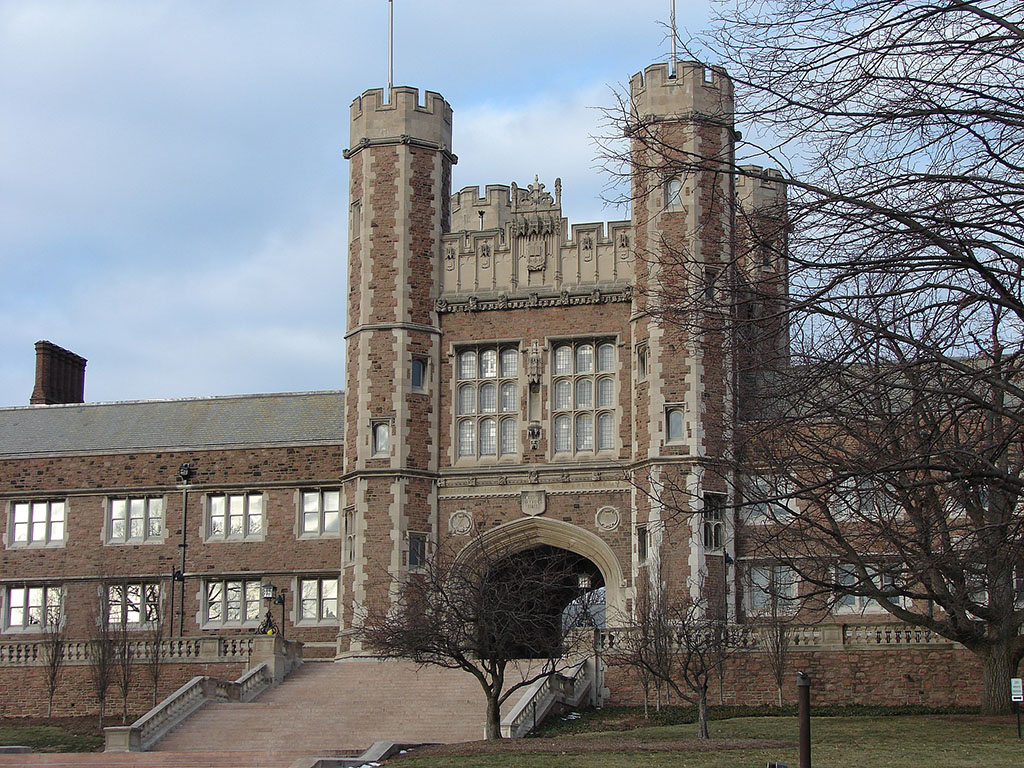

In [1]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

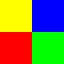

In [2]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

Rows: 768, Cols: 1024


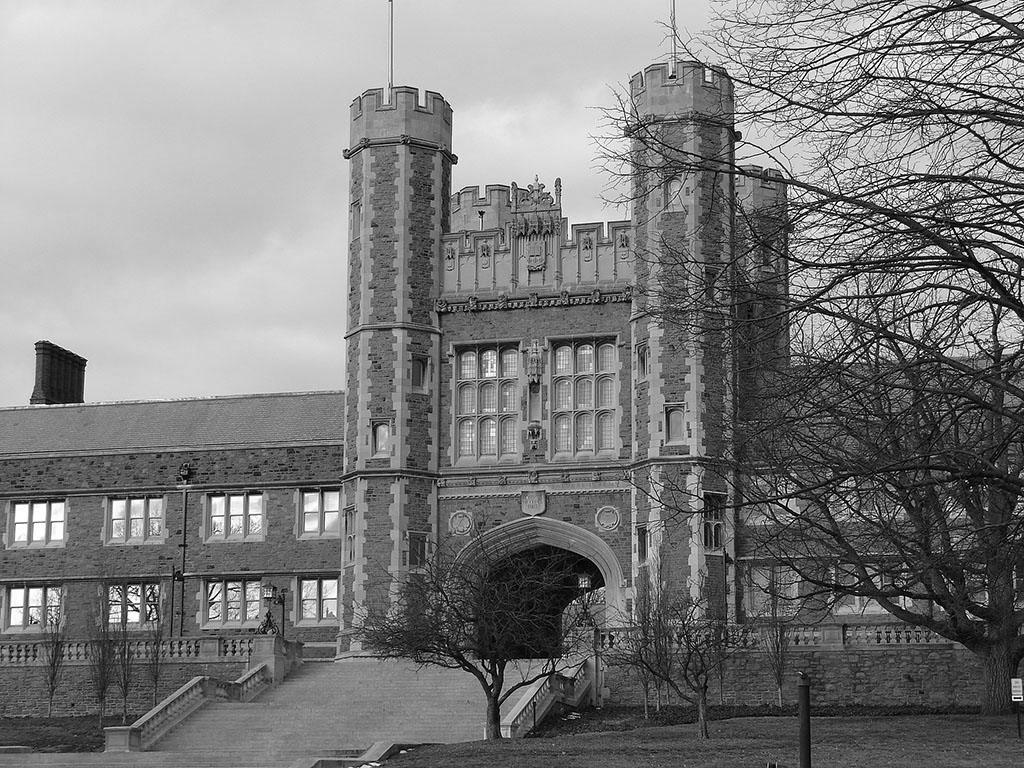

In [3]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})

img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2  

https://data.heatonresearch.com/images/jupyter/brookings.jpeg


C:\Users\HP\AppData\Local\Temp\ipykernel_15364\4189718625.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


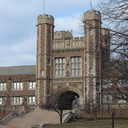

https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg


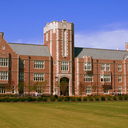

https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg


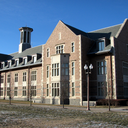

(3, 49152)


In [4]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
  "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
  "https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg",
  "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"   
]

def crop_square(image):        
    width, height = image.size
    
    # Crop the image, centered
    new_width = min(width,height)
    new_height = new_width
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    return image.crop((left, top, right, bottom))
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = crop_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)

Rows: 768, Cols: 1024
(768, 1024, 3)


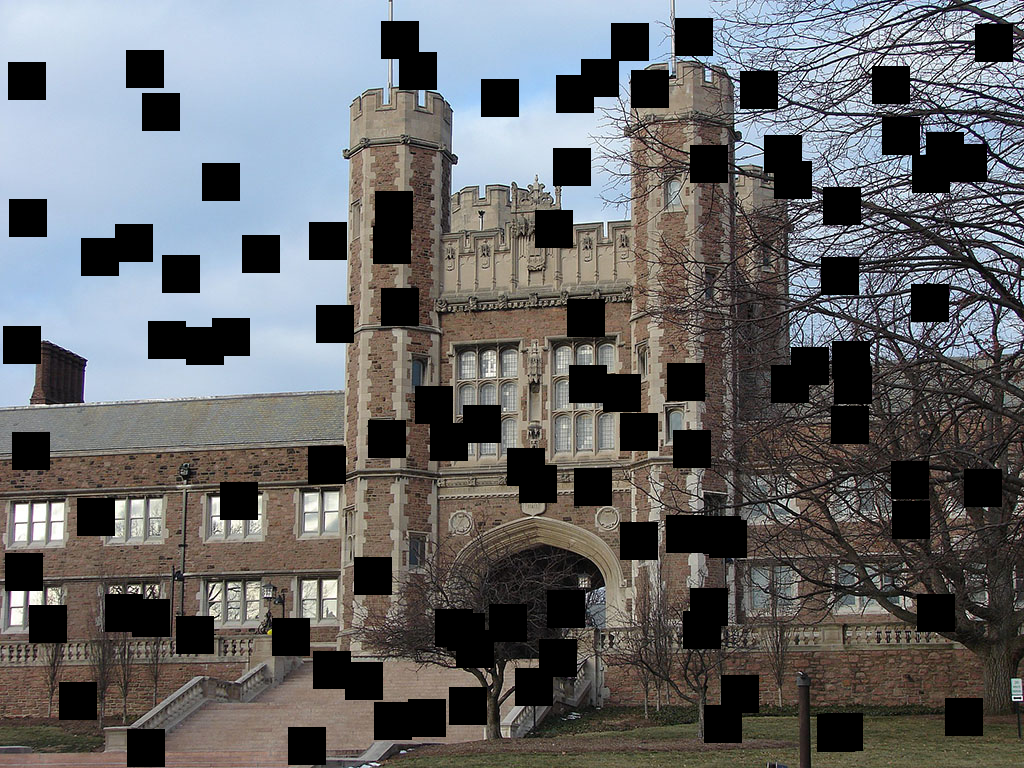

In [5]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2      

In [9]:
import os

URL = "https://github.com/jeffheaton/data-mirror/releases/"
#DOWNLOAD_SOURCE = URL+"download/v1/iris-image.zip"
DOWNLOAD_SOURCE = URL+"download/v1/paperclips.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]

if COLAB:
  PATH = "/content"
  EXTRACT_TARGET = os.path.join(PATH,"clips")
  SOURCE = os.path.join(PATH, "/content/clips/paperclips")
  TARGET = os.path.join(PATH,"/content/clips-processed")
else:
  # I used this locally on my machine, you may need different
  PATH = "/data/temp"
  EXTRACT_TARGET = os.path.join(PATH,"clips")
  SOURCE = os.path.join(PATH, "clips/paperclips")
  TARGET = os.path.join(PATH,"clips-processed")

In [10]:
# HIDE OUTPUT
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
!mkdir -p {SOURCE}
!mkdir -p {TARGET}
!mkdir -p {EXTRACT_TARGET}
!unzip -o -j -d {SOURCE} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null

'wget' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The system cannot find the path specified.


In [ ]:
import imageio
import glob
from tqdm import tqdm
from PIL import Image
import os
        
def scale(img, scale_width, scale_height):
    # Scale the image
    img = img.resize((
        scale_width, 
        scale_height), 
        Image.ANTIALIAS)
            
    return img

def standardize(image):
    rgbimg = Image.new("RGB", image.size)
    rgbimg.paste(image)
    return rgbimg

def fail_below(image, check_width, check_height):
    width, height = image.size
    assert width == check_width
    assert height == check_height    

In [ ]:
files = glob.glob(os.path.join(SOURCE,"*.jpg"))

for file in tqdm(files):
    try:
        target = ""
        name = os.path.basename(file)
        filename, _ = os.path.splitext(name)
        img = Image.open(file)
        img = standardize(img)
        img = crop_square(img)
        img = scale(img, 128, 128)
        #fail_below(img, 128, 128)

        target = os.path.join(TARGET,filename+".jpg")
        img.save(target, quality=25)
    except KeyboardInterrupt:
        print("Keyboard interrupt")
        break
    except AssertionError:
        print("Assertion")
        break
    except:
        print("Unexpected exception while processing image source: " \
              f"{file}, target: {target}" , exc_info=True)